# Importing libraries

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('iris_dataset.csv')

In [66]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Checking for null values

In [68]:
df.isnull().sum()

,0
sepal length in cm,0
sepal width in cm,0
petal length in cm,0
petal width in cm,0
class,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
df.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
df['class'].value_counts()

,count
class,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# Encoding categorical variables

In [72]:
from sklearn.preprocessing import LabelEncoder

classes = pd.DataFrame({
    'class':['Iris-setosa','Iris-versicolor','Iris-virginica']
})

le = LabelEncoder()

df['class'] = le.fit_transform(df['class'])

In [73]:
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Distribution of data

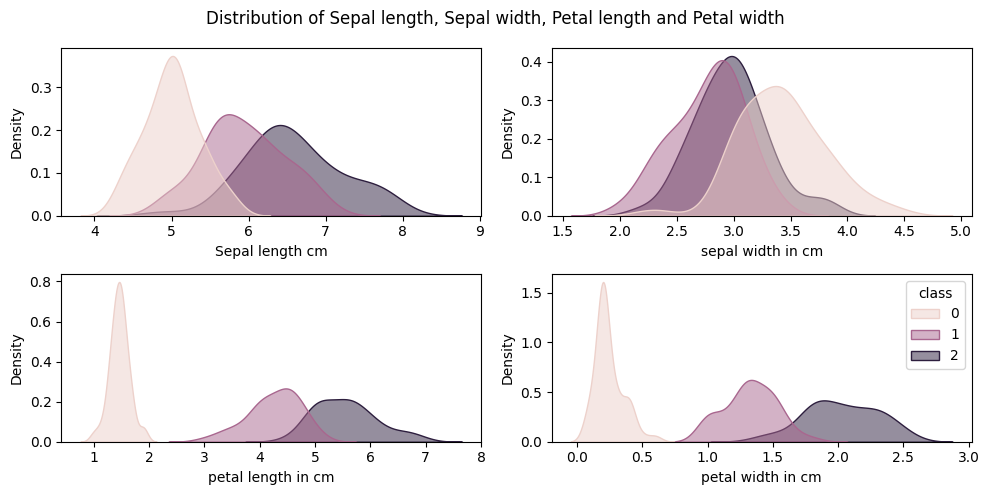

In [74]:
fig, axes = plt.subplots(2,2, figsize=(10,5), dpi=100)
fig.suptitle('Distribution of Sepal length, Sepal width, Petal length and Petal width')

sns.kdeplot(ax = axes[0,0], data=df, x='sepal length in cm', hue='class', alpha=0.5, shade=True)
axes[0,0].set_xlabel('Sepal length cm')
axes[0,0].get_legend().remove()

sns.kdeplot(ax=axes[0,1], data=df, x = 'sepal width in cm', hue='class', alpha=0.5, shade=True)
axes[0,1].set_label('Sepal width cm')
axes[0,1].get_legend().remove()

sns.kdeplot(ax=axes[1,0], data=df, x = 'petal length in cm', hue='class', alpha=0.5, shade=True)
axes[1,0].set_label('Petal length cm')
axes[1,0].get_legend().remove()

sns.kdeplot(ax=axes[1,1], data=df, x = 'petal width in cm', hue='class', alpha=0.5, shade=True)
axes[1,1].set_label('Petal width cm')

plt.tight_layout()

<Axes: >

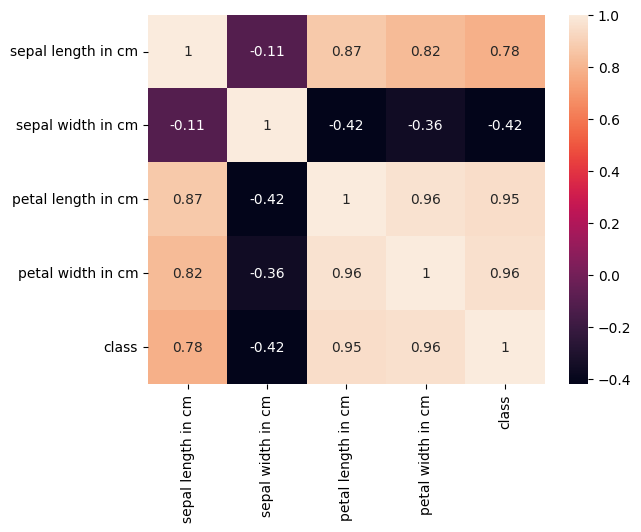

In [75]:
sns.heatmap(df.corr(),annot=True)

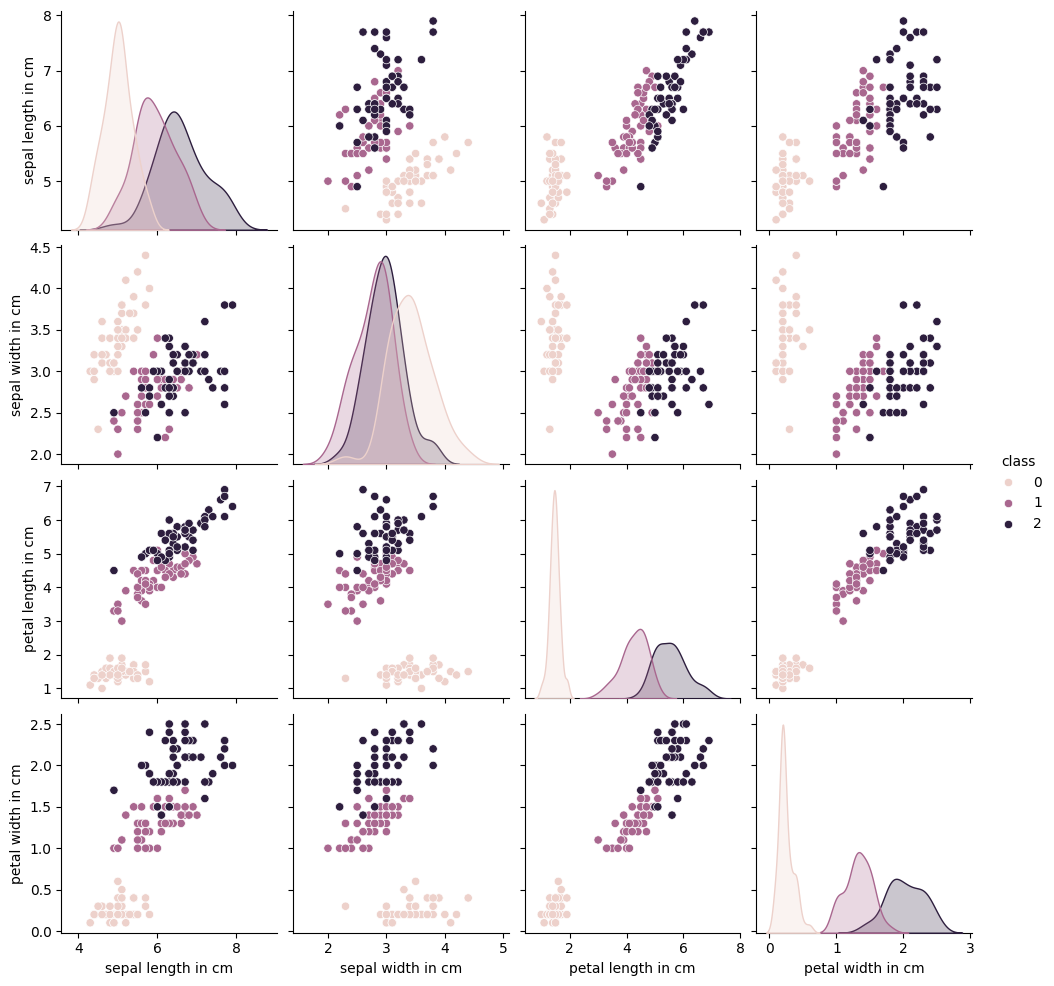

In [76]:
sns.pairplot(data=df, hue='class')

In [77]:
y = df['class']

In [78]:
X = df.drop('class',axis=1)

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=8)

# Feature scaling

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [82]:
scaled_X_train

array([[-0.88914552,  1.66004251, -1.04382736, -1.04605907],
       [-1.2574912 , -0.11263915, -1.32645209, -1.44121255],
       [-1.50305498,  1.21687209, -1.55255188, -1.30949472],
       [ 1.07536473,  0.55211647,  1.10412063,  1.19314397],
       [-0.39801796, -0.99897997,  0.36929632,  0.00768354],
       [ 1.19814662, -0.55580956,  0.59539611,  0.27111919],
       [ 0.33867338, -0.99897997,  1.04759569,  0.27111919],
       [-0.27523607, -0.11263915,  0.19972148,  0.13940137],
       [-0.39801796,  2.54638333, -1.32645209, -1.30949472],
       [-0.15245418, -0.33422435,  0.25624643,  0.13940137],
       [-0.27523607, -1.22056518,  0.08667159, -0.12403429],
       [-1.62583687, -1.66373559, -1.38297704, -1.1777769 ],
       [ 0.21589149, -0.33422435,  0.42582127,  0.40283702],
       [ 0.95258283, -0.33422435,  0.48234622,  0.13940137],
       [ 0.0931096 , -0.11263915,  0.76497095,  0.7979905 ],
       [-1.01192742,  0.55211647, -1.32645209, -1.30949472],
       [-1.01192742,  0.

# Model building

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [84]:
from sklearn.tree import DecisionTreeClassifier

dec = DecisionTreeClassifier()
dec.fit(scaled_X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred = dec.predict(scaled_X_test)

In [86]:
cm = confusion_matrix(y_test,y_pred,labels=dec.classes_)

<Axes: >

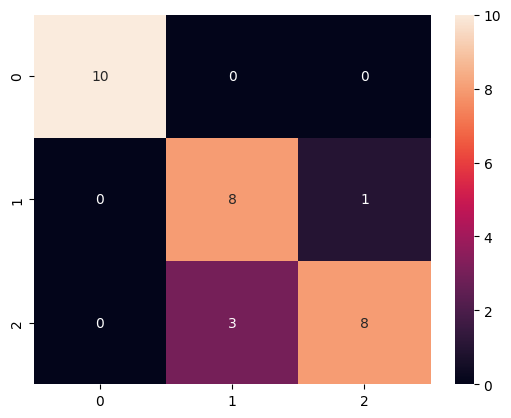

In [87]:
sns.heatmap(cm,annot=True)

<Axes: >

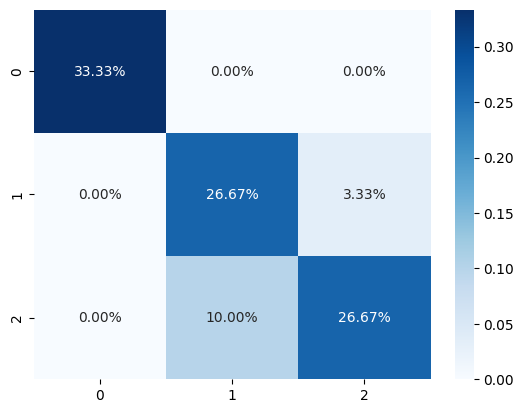

In [88]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [89]:
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 3)

0.867

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.73      0.89      0.80         9
           2       0.89      0.73      0.80        11

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



In [91]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(scaled_X_train,y_train)

LogisticRegression()

In [92]:
y_pred = log.predict(scaled_X_test)

In [93]:
cm = confusion_matrix(y_test, y_pred,labels=log.classes_)

<Axes: >

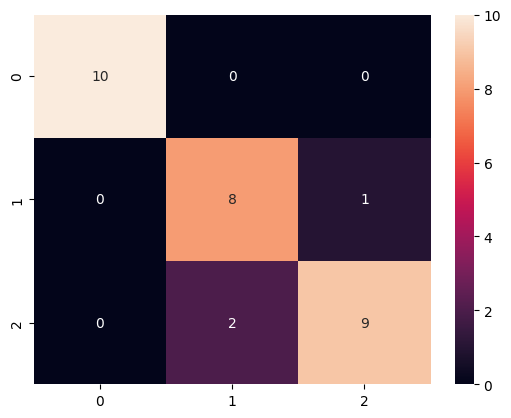

In [94]:
sns.heatmap(cm, annot=True)

<Axes: >

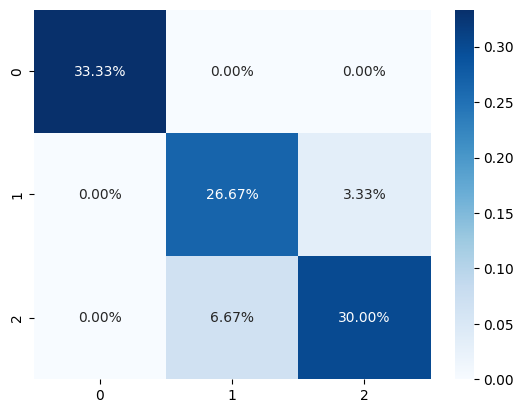

In [95]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

In [96]:
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 3)

0.9

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      0.89      0.84         9
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Decision Tree Classifier gave 0.87 while Logistic Regression gave  0.9. Hence LR works better in this dataset.